In [2]:
pwd

'C:\\Users\\sharlin.kahlon'

In [18]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as plt
%matplotlib inline


In [9]:
#Loading Dataset
df= pd.read_csv("SKDataset-finalProject.csv", sep=",")
df.head()

,id,Issue_Date,Emp_Length_Int,Home_Ownership,Annual_Income,Loan_Amount,Term,Purpose,Interest_Payments,Loan_Status,Interest_Rate,DTI,Total_Payment,Total_Rec_Prncp,Installment,Region
0,643218,01-12-2010,7.0,MORTGAGE,45000,20000.0,60 months,debt_consolidation,Low,Good Loan,9.99,13.36,24421.720000,20000.00,424.85,ulster
1,642872,01-12-2010,0.5,OWN,145000,7475.0,60 months,debt_consolidation,High,Good Loan,13.72,17.39,10370.742730,7475.00,172.85,leinster
2,642861,01-12-2010,0.5,MORTGAGE,120000,5575.0,36 months,small_business,High,Good Loan,15.20,16.40,6819.090000,5574.99,193.81,Northern-Irl
3,642859,01-12-2010,0.5,RENT,120000,2150.0,60 months,debt_consolidation,High,Good Loan,14.83,6.16,2816.830000,2150.00,50.96,Northern-Irl
4,642857,01-12-2010,0.5,MORTGAGE,140000,7050.0,60 months,moving,Low,Good Loan,12.98,4.26,9619.300001,7050.00,160.34,ulster


In [10]:
df.shape

(74181, 16)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74181 entries, 0 to 74180
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 74181 non-null  int64  
 1   Issue_Date         74181 non-null  object 
 2   Emp_Length_Int     74181 non-null  float64
 3   Home_Ownership     74131 non-null  object 
 4   Annual_Income      74181 non-null  int64  
 5   Loan_Amount        74161 non-null  float64
 6   Term               74181 non-null  object 
 7   Purpose            74181 non-null  object 
 8   Interest_Payments  74181 non-null  object 
 9   Loan_Status        74181 non-null  object 
 10  Interest_Rate      74181 non-null  float64
 11  DTI                74181 non-null  float64
 12  Total_Payment      74181 non-null  float64
 13  Total_Rec_Prncp    74181 non-null  float64
 14  Installment        74181 non-null  float64
 15  Region             74169 non-null  object 
dtypes: float64(7), int64(2

In [5]:
df.isnull().sum()

id                    0
Issue_Date            0
Emp_Length_Int        0
Home_Ownership       50
Annual_Income         0
Loan_Amount          20
Term                  0
Purpose               0
Interest_Payments     0
Loan_Status           0
Interest_Rate         0
DTI                   0
Total_Payment         0
Total_Rec_Prncp       0
Installment           0
Region               12
dtype: int64

Missing Values are removed using mean and mode. 

In [6]:
#Missing Values for numerical
df['Loan_Amount']= df['Loan_Amount'].fillna(df['Loan_Amount'].mean())

In [13]:
#for categorical
df['Region']= df['Region'].fillna(df['Region'].mode()[0])
df['Home_Ownership']= df['Home_Ownership'].fillna(df['Home_Ownership'].mode()[0])

In [9]:
df.isnull().sum()

id                   0
Issue_Date           0
Emp_Length_Int       0
Home_Ownership       0
Annual_Income        0
Loan_Amount          0
Term                 0
Purpose              0
Interest_Payments    0
Loan_Status          0
Interest_Rate        0
DTI                  0
Total_Payment        0
Total_Rec_Prncp      0
Installment          0
Region               0
dtype: int64

In [10]:
#Label Encoding
df.replace({"Loan_Status":{'Bad Loan':0,'Good Loan':1}},inplace= True)

In [11]:
df.head()

,id,Issue_Date,Emp_Length_Int,Home_Ownership,Annual_Income,Loan_Amount,Term,Purpose,Interest_Payments,Loan_Status,Interest_Rate,DTI,Total_Payment,Total_Rec_Prncp,Installment,Region
0,643218,01-12-2010,7.0,MORTGAGE,45000,20000.0,60 months,debt_consolidation,Low,1,9.99,13.36,24421.720000,20000.00,424.85,ulster
1,642872,01-12-2010,0.5,OWN,145000,7475.0,60 months,debt_consolidation,High,1,13.72,17.39,10370.742730,7475.00,172.85,leinster
2,642861,01-12-2010,0.5,MORTGAGE,120000,5575.0,36 months,small_business,High,1,15.20,16.40,6819.090000,5574.99,193.81,Northern-Irl
3,642859,01-12-2010,0.5,RENT,120000,2150.0,60 months,debt_consolidation,High,1,14.83,6.16,2816.830000,2150.00,50.96,Northern-Irl
4,642857,01-12-2010,0.5,MORTGAGE,140000,7050.0,60 months,moving,Low,1,12.98,4.26,9619.300001,7050.00,160.34,ulster


Descriptive Statistics-
This is to calculate basic statistics for all continous variables. 
Describe functions- give values of Mean, IQR values, Min, Max value and Standard Deviation
#For Numerical attributes:- 

In [11]:
df.describe()

,id,Emp_Length_Int,Annual_Income,Loan_Amount,Interest_Rate,DTI,Total_Payment,Total_Rec_Prncp,Installment
count,7.418100e+04,74181.000000,7.418100e+04,74161.000000,74181.000000,74181.000000,74181.000000,74181.000000,74181.000000
mean,1.237230e+06,5.486336,6.946324e+04,12515.776149,13.207386,15.600123,13408.011613,10651.045665,389.389523
std,5.702563e+05,3.466796,6.455445e+04,7794.750011,4.131073,7.544646,9281.509370,7350.064745,239.220559
min,5.473400e+04,0.500000,1.896000e+03,500.000000,5.420000,0.000000,0.000000,0.000000,15.670000
25%,6.073330e+05,2.000000,4.200000e+04,6400.000000,10.160000,9.970000,6444.386955,5000.000000,205.010000
50%,1.325061e+06,5.000000,6.000000e+04,10250.000000,13.110000,15.450000,11445.370000,9600.000000,343.390000
75%,1.550404e+06,10.000000,8.320000e+04,17050.000000,15.800000,20.990000,18205.170000,14950.000000,515.740000
max,2.844673e+06,10.000000,7.141778e+06,35000.000000,24.890000,34.990000,57777.579870,35000.010000,1388.450000


Summary Statistics of character column. 

In [12]:
df.describe(include=['object'])

,Issue_Date,Home_Ownership,Term,Purpose,Interest_Payments,Loan_Status,Region
count,74181,74131,74181,74181,74181,74181,74169
unique,55,4,2,14,2,2,5
top,01-11-2012,RENT,36 months,debt_consolidation,Low,Good Loan,ulster
freq,6382,34363,60903,39917,39226,62599,19382


Median

In [13]:
df.median()

id                 1325061.00
Emp_Length_Int           5.00
Annual_Income        60000.00
Loan_Amount          10250.00
Interest_Rate           13.11
DTI                     15.45
Total_Payment        11445.37
Total_Rec_Prncp       9600.00
Installment            343.39
dtype: float64

Mode

In [16]:
df.mode()

,id,Issue_Date,Emp_Length_Int,Home_Ownership,Annual_Income,Loan_Amount,Term,Purpose,Interest_Payments,Loan_Status,Interest_Rate,DTI,Total_Payment,Total_Rec_Prncp,Installment,Region
0,54734,01-11-2012,10.0,RENT,60000.0,10000.0,36 months,debt_consolidation,Low,Good Loan,12.12,0.0,11977.77039,10000.0,332.72,ulster
1,55521,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,55742,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,56413,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,57245,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74176,2837228,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
74177,2837301,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
74178,2837644,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
74179,2837824,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Label Encoding is to change categorical into numerical value

In [22]:
#converting categorical into Numerical
df.replace({"Home_Ownership":{'MORTGAGE':1,'OWN':2, 'RENT':3, 'OTHER':4}},inplace= True)
df.replace({"Interest_Payments":{'Low':0,'High':2}},inplace= True)
df.replace({"Region":{'cannught':0,'leinster':1, 'munster':2, 'Northern-Irl':4, 'ulster':5}},inplace= True)
df.head()

,id,Issue_Date,Emp_Length_Int,Home_Ownership,Annual_Income,Loan_Amount,Term,Purpose,Interest_Payments,Loan_Status,Interest_Rate,DTI,Total_Payment,Total_Rec_Prncp,Installment,Region
0,643218,01-12-2010,7.0,1.0,45000,20000.0,60 months,debt_consolidation,0,Good Loan,9.99,13.36,24421.720000,20000.00,424.85,5.0
1,642872,01-12-2010,0.5,2.0,145000,7475.0,60 months,debt_consolidation,2,Good Loan,13.72,17.39,10370.742730,7475.00,172.85,1.0
2,642861,01-12-2010,0.5,1.0,120000,5575.0,36 months,small_business,2,Good Loan,15.20,16.40,6819.090000,5574.99,193.81,4.0
3,642859,01-12-2010,0.5,3.0,120000,2150.0,60 months,debt_consolidation,2,Good Loan,14.83,6.16,2816.830000,2150.00,50.96,4.0
4,642857,01-12-2010,0.5,1.0,140000,7050.0,60 months,moving,0,Good Loan,12.98,4.26,9619.300001,7050.00,160.34,5.0


Exploratory Data Analysis

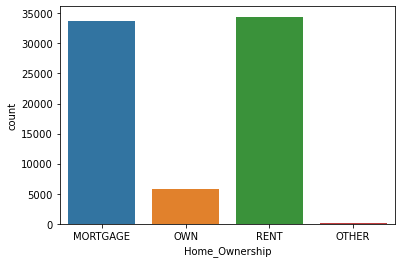

In [14]:
sns.countplot(df['Home_Ownership'])

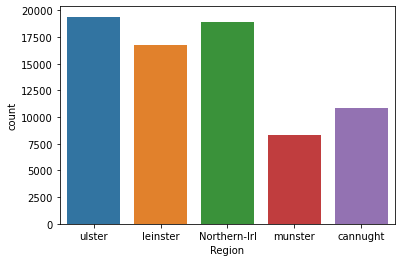

In [15]:
sns.countplot(df['Region'])

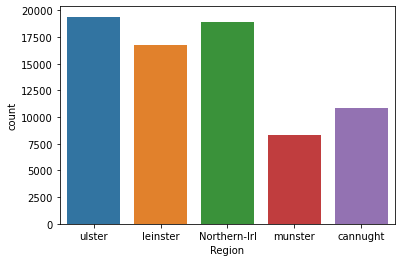

In [16]:
sns.countplot(df['Region'])

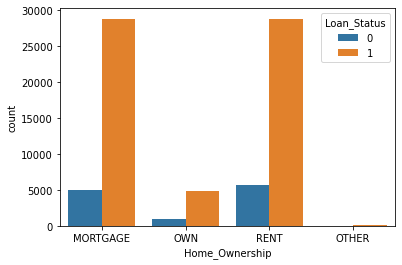

In [17]:
sns.countplot(x='Home_Ownership', hue='Loan_Status', data=df)

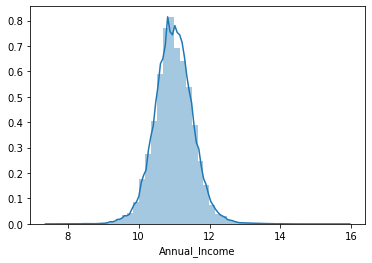

In [13]:
df['Annual_Income']=np.log(df['Annual_Income'])
sns.distplot(df["Annual_Income"])

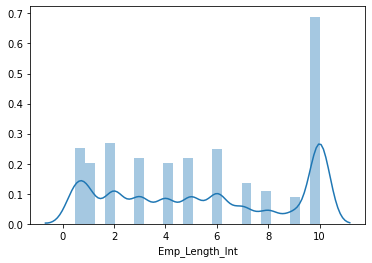

In [12]:
sns.distplot(df["Emp_Length_Int"])

Correlation Matrix

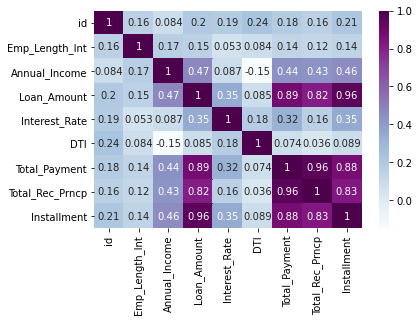

In [14]:
corr = df.corr()
sns.heatmap(corr, annot=True, cmap="BuPu")

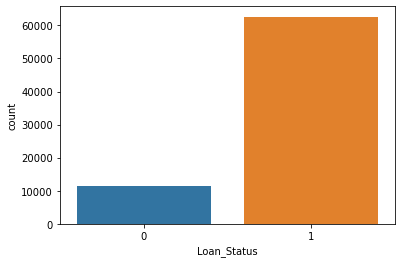

In [19]:
sns.countplot(df['Loan_Status'])

We can say data is imbalanced - hence we need to balance dataset for better accuracy. 

In [20]:
#Emp length is float and home ownership( we already replaced with numerical value), purpose, and term are nominal values
nominal_columns= ["Term", "Purpose"]
dummy_df = pd.get_dummies(df[nominal_columns])
df= pd.concat([df, dummy_df], axis=1)
df= df.drop(nominal_columns, axis=1)
df.head()


,id,Issue_Date,Emp_Length_Int,Home_Ownership,Annual_Income,Loan_Amount,Interest_Payments,Loan_Status,Interest_Rate,DTI,...,Purpose_home_improvement,Purpose_house,Purpose_major_purchase,Purpose_medical,Purpose_moving,Purpose_other,Purpose_renewable_energy,Purpose_small_business,Purpose_vacation,Purpose_wedding
0,643218,01-12-2010,7.0,1,45000,20000.0,0,1,9.99,13.36,...,0,0,0,0,0,0,0,0,0,0
1,642872,01-12-2010,0.5,2,145000,7475.0,2,1,13.72,17.39,...,0,0,0,0,0,0,0,0,0,0
2,642861,01-12-2010,0.5,1,120000,5575.0,2,1,15.20,16.40,...,0,0,0,0,0,0,0,1,0,0
3,642859,01-12-2010,0.5,3,120000,2150.0,2,1,14.83,6.16,...,0,0,0,0,0,0,0,0,0,0
4,642857,01-12-2010,0.5,1,140000,7050.0,0,1,12.98,4.26,...,0,0,0,0,1,0,0,0,0,0


In [21]:
#Separating Data and Label
X=df.drop(columns=['id', 'Loan_Status','Issue_Date'], axis=1)
Y=df['Loan_Status']

print(X)
print(Y)

       Emp_Length_Int  Home_Ownership  Annual_Income  Loan_Amount  \
0                7.00               1          45000      20000.0   
1                0.50               2         145000       7475.0   
2                0.50               1         120000       5575.0   
3                0.50               3         120000       2150.0   
4                0.50               1         140000       7050.0   
...               ...             ...            ...          ...   
74176            7.00               3          60000      20500.0   
74177            3.00               3          57600      15000.0   
74178            3.00               1         160000      35000.0   
74179            6.05               1          35000      12000.0   
74180            7.00               3          50000      12000.0   

       Interest_Payments  Interest_Rate    DTI  Total_Payment  \
0                      0           9.99  13.36   24421.720000   
1                      2          13.72  

In [22]:
#Split Data
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score

X_train, X_test, Y_train, Y_test= train_test_split(X,Y,test_size=0.2,stratify=Y,random_state=2)

print(X.shape, X_train.shape, X_test.shape)

(74181, 27) (59344, 27) (14837, 27)


In [ ]:
#Training the model- Support Vector Machine
classifier = svm.SVC(kernel='linear')

In [ ]:
#Train Model
classifier.fit(X_train,Y_train)

Model Evaluation

In [1]:
X_train_Prediction = classifier.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)

print('Accuracy:', training_data_accuracy)

NameError: name 'classifier' is not defined